## Loading Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'C:\Users\Lenovo\Desktop\Airbnb_Price_Analysis\data\NYC-Airbnb-2023-Cleaned.csv')

In [3]:
## Top five rows of the dataset

data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21 00:00:00,0.30,3,314,1
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02 00:00:00,0.30,2,365,0
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21 00:00:00,0.72,1,0,0
3,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10 00:00:00,0.03,1,181,1
4,5586,Rooftop Deck/City Views. Great Apt,8526,Susan,Manhattan,Upper East Side,40.76076,-73.96156,Entire home/apt,295,4,45,2022-10-03 00:00:00,0.27,1,1,4


In [4]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

#### As you can see our data is cleaned.

## EDA on the dataset

In [5]:
data['room_type'].value_counts()

room_type
Entire home/apt    21285
Private room       15358
Shared room          498
Hotel room           159
Name: count, dtype: int64

In [6]:
average_price_of_all_room_type = [data[data['room_type'] == 'Entire home/apt']['price'].mean(),
                                  data[data['room_type'] == 'Private room']['price'].mean(),
                                  data[data['room_type'] == 'Shared room']['price'].mean(),
                                  data[data['room_type'] == 'Hotel room']['price'].mean()]

In [7]:
for room_type, price in zip(data['room_type'].unique(), average_price_of_all_room_type):
    print(f'The average price of {room_type} is {np.round(price, 2)}')

The average price of Entire home/apt is 182.88
The average price of Private room is 74.06
The average price of Hotel room is 61.76
The average price of Shared room is 229.81


Text(0.5, 1.0, 'Average Price of Different Room Types')

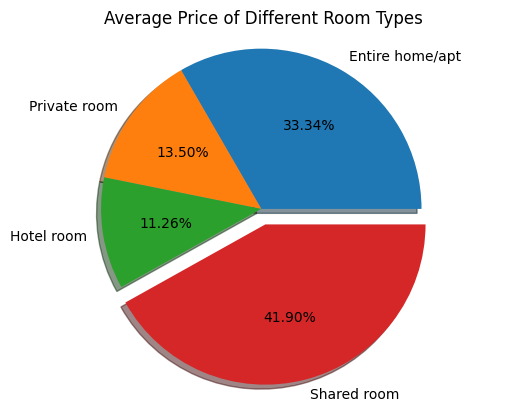

In [15]:
plt.pie(average_price_of_all_room_type, labels = data['room_type'].unique(), autopct = '%.2f%%', explode=[0, 0, 0, 0.1], shadow = True)
plt.axis('equal')
plt.title('Average Price of Different Room Types')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3556\1719894261.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = data['room_type'], y = data['price'], palette='viridis')


Text(0.5, 1.0, 'Room Type Distribution')

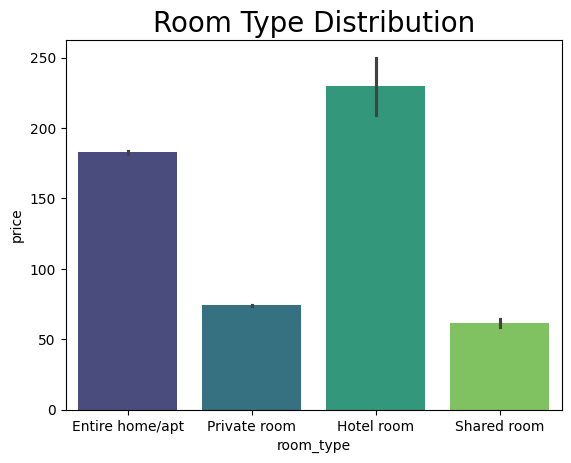

In [9]:
sns.barplot(x = data['room_type'], y = data['price'], palette='viridis')
plt.title('Room Type Distribution', fontsize=20)

### So as we can that hotel room type charges more as compare to other home types.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3556\239267906.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='neighbourhood_group', y='price', data=data, palette='viridis')


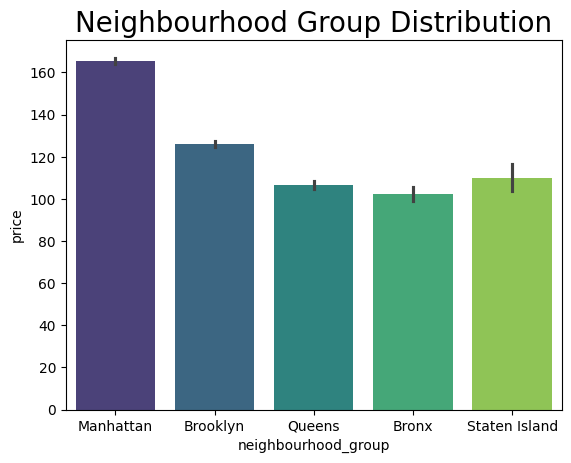

In [19]:
sns.barplot(x='neighbourhood_group', y='price', data=data, palette='viridis')
plt.title('Neighbourhood Group Distribution', fontsize=20)
plt.show()

Text(0.5, 1.0, 'Neighbourhood Group Distribution with Room Type')

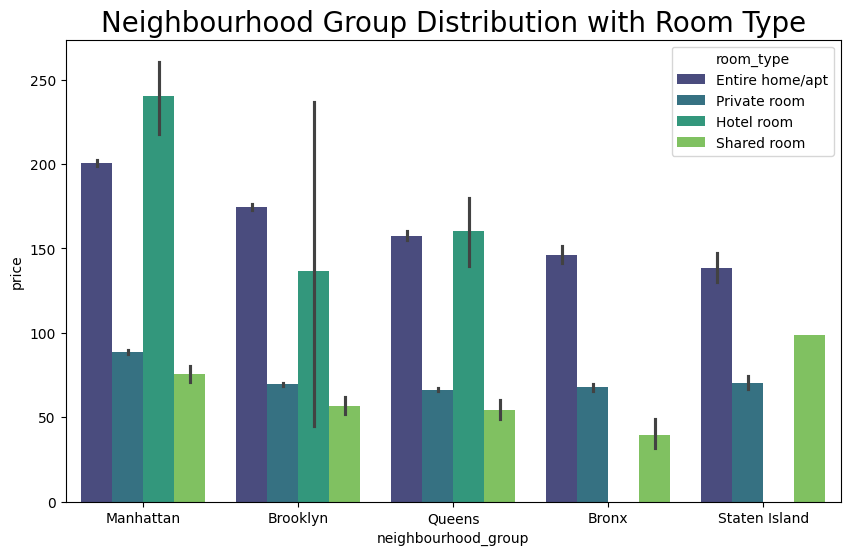

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_group', y='price', hue='room_type', data=data, palette='viridis')
plt.title('Neighbourhood Group Distribution with Room Type', fontsize=20)

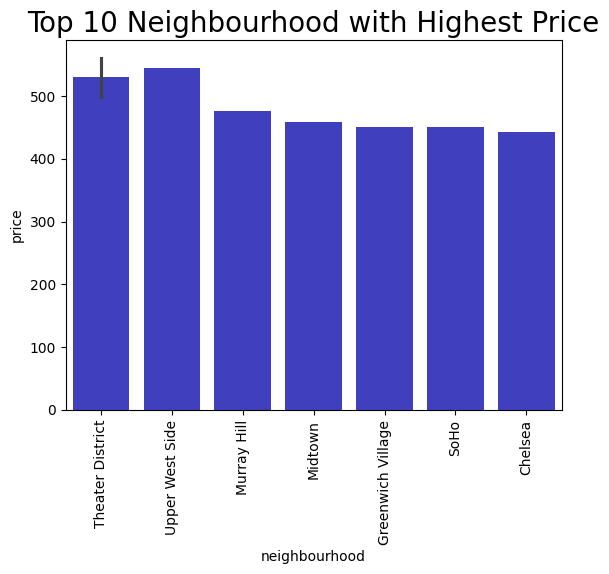

In [33]:
top_data = data.sort_values('price', ascending=False).head(10)
sns.barplot(x=top_data['neighbourhood'], y=top_data['price'], color='blue', saturation=0.5)
plt.title('Top 10 Neighbourhood with Highest Price', fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [16]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21 00:00:00,0.30,3,314,1
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02 00:00:00,0.30,2,365,0
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21 00:00:00,0.72,1,0,0
3,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10 00:00:00,0.03,1,181,1
4,5586,Rooftop Deck/City Views. Great Apt,8526,Susan,Manhattan,Upper East Side,40.76076,-73.96156,Entire home/apt,295,4,45,2022-10-03 00:00:00,0.27,1,1,4
